### Question 1

Overview: How many rows (samples) and columns (features) are present in the dataset?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
np.random.seed(42)
random.seed(42)
from sklearn.model_selection import train_test_split
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# These two lines are necessary to let this colab file access your google drive directory to read the csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Question 1
file_path = '/content/drive/MyDrive/ECE219 Project 1/Project1-ClassificationDataset.csv'
#file_path = '/content/Project1-ClassificationDataset.csv'

df = pd.read_csv(file_path)
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports


In [ ]:
df.shape

(3476, 8)

Dataset has 3476 rows and 8 columns

Histograms: Plot 3 histograms on : (a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis;

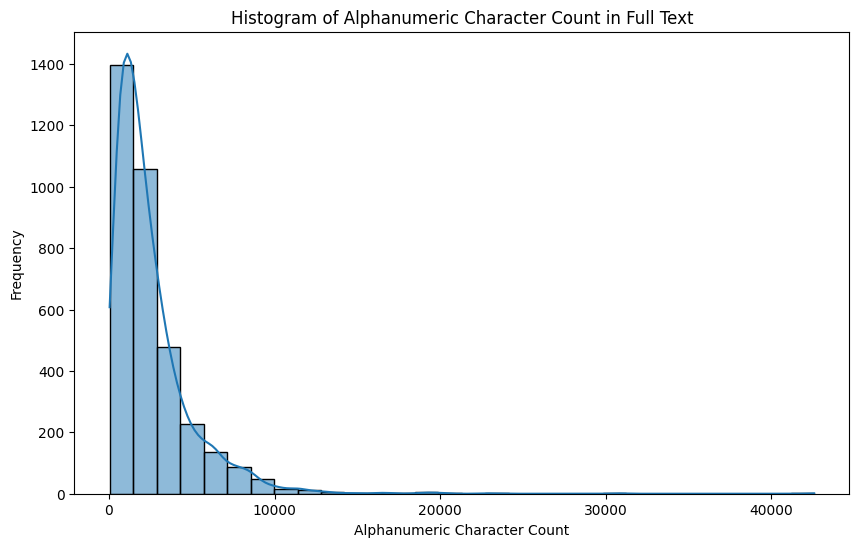

In [ ]:
# Statistical data visualization library, makes this histogram look nicer
import seaborn as sns

# Function to count alphanumeric characters in a string
def count_alphanumeric(s):
    return sum(c.isalnum() for c in str(s))

# Histogram of the total number of alphanumeric characters in 'full text'
if 'full_text' in df.columns:
    df['alphanumeric_count'] = df['full_text'].apply(count_alphanumeric)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['alphanumeric_count'], bins=30, kde=True)
    plt.title('Histogram of Alphanumeric Character Count in Full Text')
    plt.xlabel('Alphanumeric Character Count')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'full_text' column is not present in the dataset.")

(b) The column leaf label – class on the x-axis;

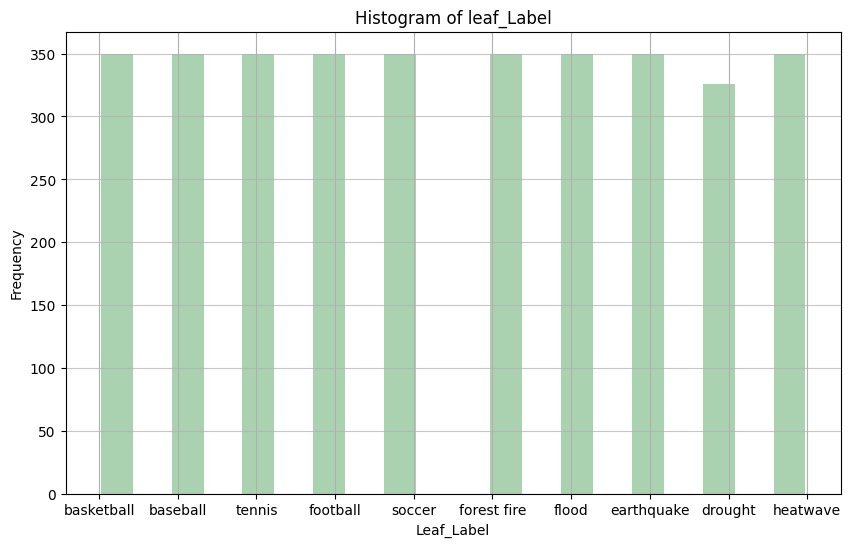

In [ ]:
# Generating a histogram to show leaf_label frequency
plt.figure(figsize=(10, 6))
df['leaf_label'].hist(rwidth=0.9, bins=20, color='#86bf91', alpha=0.7)

plt.title(f'Histogram of leaf_Label')
plt.xlabel('Leaf_Label')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.show()

(c) The column root label – class on the x-axis.

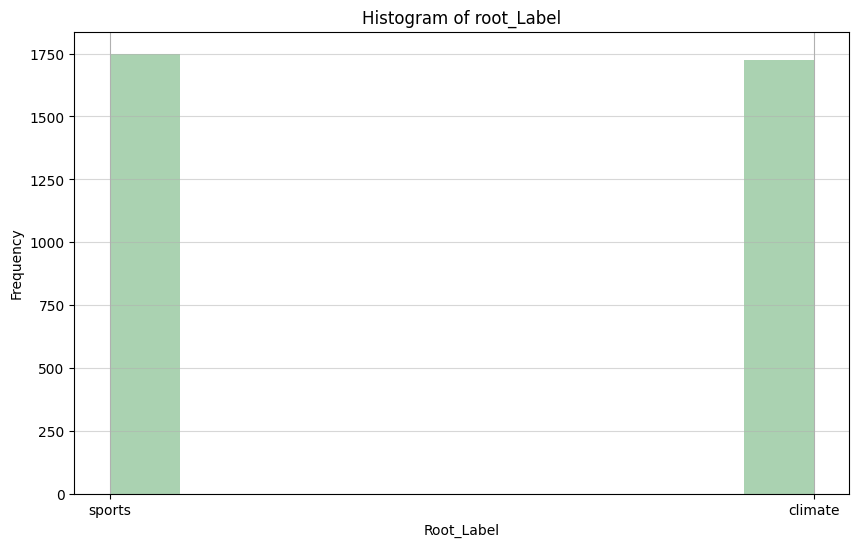

In [ ]:
# Generating a histogram to show root_label count
plt.figure(figsize=(10, 6))
df['root_label'].hist(color='#86bf91', alpha=0.7)

plt.title(f'Histogram of root_Label')
plt.xlabel('Root_Label')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)

plt.show()

### Question 2
Report the number of training and testing samples.

In [ ]:
# Question 2

# Set random seeds for consistency
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

In [ ]:
# The number of training samples
train.shape

(2780, 2)

In [ ]:
# The number of testing samples
test.shape

(696, 2)

### Question 3
Use the following specs to extract features from the textual data:

Before doing anything, please clean each data sample using the code block provided above. This function helps remove many but not all HTML artifacts from the crawler’s output. You can also build your own cleaning module if you find this function to be ineffective.

Use the “english” stopwords of the CountVectorizer 4

Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)

Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag • Use min df=3



After doing this, report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of k×103 . This dimension will vary depending on your exact method of cleaning and lemmatizing and that is okay.

In [ ]:
# Question 3
import re
def clean(row):
        text = row['full_text']
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        texter = re.sub(r'\d+', '', text)
        texter = re.sub(r"<br />", " ", texter)
        texter = re.sub(r"&quot;", "\"",texter)
        texter = re.sub('&#39;', "\"", texter)
        texter = re.sub('\n', " ", texter)
        texter = re.sub(' u '," you ", texter)
        texter = re.sub('`',"", texter)
        texter = re.sub(' +', ' ', texter)
        texter = re.sub(r"(!)\1+", r"!", texter)
        texter = re.sub(r"(\?)\1+", r"?", texter)
        texter = re.sub('&amp;', 'and', texter)
        texter = re.sub('\r', ' ',texter)
        clean = re.compile('<.*?>')
        texter = texter.encode('ascii', 'ignore').decode('ascii')
        texter = re.sub(clean, '', texter)
        if texter == "":
            texter = ""
        return texter

In [ ]:
# # # Here is Gian's code for question 3. It is similar to Akanksha's but with a few differences in the creation of TF-IDF matrices

# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# import nltk
# from nltk import pos_tag
# from nltk import wordnet, word_tokenize
# nltk.download('punkt')
# # Apply cleaning function to train and test datasets
# train_cleaned = train["full text"].apply(clean) if 'full text' in train.columns else train["full_text"].apply(clean)
# test_cleaned = test["full text"].apply(clean) if 'full text' in test.columns else test["full_text"].apply(clean)

# # Function to convert NLTK POS tags to WordNet POS tags
# def nltk_tag_to_wordnet_tag(nltk_tag):
#     if nltk_tag.startswith('J'):
#         return wordnet.ADJ
#     elif nltk_tag.startswith('V'):
#         return wordnet.VERB
#     elif nltk_tag.startswith('N'):
#         return wordnet.NOUN
#     elif nltk_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return None

# # Lemmatization function
# # def lemmatize_text(text):
# #     lemmatizer = wordnet.WordNetLemmatizer()
# #     nltk_tagged = pos_tag(word_tokenize(text))
# #     wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
# #     lemmatized_sentence = []
# #     for word, tag in wordnet_tagged:
# #         if tag is None:
# #             lemmatized_sentence.append(word)
# #         else:
# #             lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
# #     return " ".join(lemmatized_sentence)



# # Apply lemmatization to the cleaned text
# train_lemmatized = train_cleaned.apply(lemmatize_text)
# test_lemmatized = test_cleaned.apply(lemmatize_text)

# # Create TF-IDF matrices
# vectorizer = CountVectorizer(stop_words='english', min_df=3, token_pattern=r'(?u)\b[A-Za-z]+\b')
# tfidf_transformer = TfidfTransformer()

# # Fit and transform the training data
# X_train_counts = vectorizer.fit_transform(train_lemmatized)
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# # Transform the testing data (do not fit to avoid data leakage)
# X_test_counts = vectorizer.transform(test_lemmatized)
# X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# # Shapes of the TF-IDF matrices for training and testing sets
# print(X_train_tfidf.shape, X_test_tfidf.shape)

In [ ]:
train['cleaned_text'] = train.apply(clean, axis=1)

In [ ]:
test['cleaned_text'] = test.apply(clean, axis=1)

In [ ]:
train['cleaned_text'].iloc[2305]

'\'Hamidullah Nadeem was a lonely figure at COP, the U.N. climate summit that just ended. He was of only a handful of people from Afghanistan who attended. Afghanistan is, according to the U.N., one of the ten countries most affected by climate change, with repeated droughts and flash floods taking a toll on local communities and the agrarian economy. But the U.N. has not invited representatives from Afghanistan to its climate summits since the Taliban took power in  and in deferred a decision on future Afghanistan representation. U.N. representatives have not responded to journalists who\'ve asked for an explanation. Nadeem. a -year-old from Afghanistan who\'s currently studying business at Australia\'s Monash University, came as part of his school\'s delegation, with his travel expenses covered. (A number of universities sent delegations.) He literally went from booth to booth, talking to country representatives and nonprofit groups. He organized a "side event" - an unofficial meetin

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(treebank_tag):
    """
    Map POS tagger output to WordNet POS tagger input
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_with_pos(row):
    """
    Lemmatize the words in the text with POS tagging
    """
    text = row['cleaned_text']
    tokens = word_tokenize(text)
    postags = pos_tag(tokens)

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []

    for word, postag in postags:
        wordnet_pos = get_wordnet_pos(postag)
        if wordnet_pos:
            lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
        else:
            lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)

    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text


train['lemmatized_text'] = train.apply(lemmatize_with_pos, axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
test['lemmatized_text'] = test.apply(lemmatize_with_pos, axis=1)

In [ ]:
train.head(1)

,full_text,root_label,cleaned_text,lemmatized_text
2677,'While the four-day Aftershock's economic impa...,climate,'While the four-day Aftershock's economic impa...,'While the four-day Aftershock 's economic imp...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
corpus = train['lemmatized_text'].values
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

In [ ]:
corpus_test = test['lemmatized_text'].values
vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
X_test = vectorizer.fit_transform(corpus_test)
feature_names_test = vectorizer.get_feature_names_out()

In [ ]:
X_test.shape

(696, 6715)

In [ ]:
train2 = pd.DataFrame(X.toarray(), columns=feature_names)

In [ ]:
test2 = pd.DataFrame(X_test.toarray(), columns=feature_names_test)

In [ ]:
train2["id"] = train2.index + 1
train["id"] = train.index + 1

In [ ]:
train2["id"] = train2.index + 1

In [ ]:
train.head()

,full_text,root_label,cleaned_text,lemmatized_text,id
2677,'While the four-day Aftershock's economic impa...,climate,'While the four-day Aftershock's economic impa...,'While the four-day Aftershock 's economic imp...,2678
1204,'CBS Essentials is created independently of th...,sports,'CBS Essentials is created independently of th...,'CBS Essentials be create independently of the...,1205
2955,'Moderate-to-severe drought will likely contin...,climate,'Moderate-to-severe drought will likely contin...,'Moderate-to-severe drought will likely contin...,2956
2266,"'Colleen Flood, the longtime co-owner of The F...",climate,"'Colleen Flood, the longtime co-owner of The F...","'Colleen Flood , the longtime co-owner of The ...",2267
611,'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE. Y...,sports,'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE. Y...,'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE . ...,612


In [ ]:
train2 = pd.concat([train, train2], axis=1)

In [ ]:
train2 = train.join(train2, on='id', how='left', lsuffix='_left', rsuffix='_right')

In [ ]:
from sklearn.decomposition import TruncatedSVD

num_components=[1, 10, 50, 100, 200, 500, 1000, 2000]
for i in range(len(num_components)):
  svd = TruncatedSVD(n_components=num_components[i], n_iter=100, random_state=42)
  svd.fit_transform(X)
  plt.subplot(2, 4, i+1)
  plt.plot(np.cumsum((svd.explained_variance_ratio_)))

In [ ]:
from sklearn.decomposition import TruncatedSVD

num_components=[1, 10, 50, 100, 200, 500, 1000, 2000]
for i in range(len(num_components)):
  svd = TruncatedSVD(n_components=num_components[i], n_iter=100, random_state=42)
  svd.fit_transform(X)
  # print(svd.explained_variance_ratio_.cumsum())
  # plt.subplot(2, 4, i+1)
  plt.plot(np.cumsum((svd.explained_variance_ratio_)))


plt.title('Explained Variance Ratio for Varied k')
plt.legend(["k = 1", "k = 10", "k = 50", "k = 100", "k = 200", "k = 500", "k = 1000", "k = 2000"], loc ="lower right")
plt.show()

In [ ]:
num_components=50
svd = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)
X_LSI = svd.fit_transform(X) #svd_train = X_transformed
X_test_LSI = svd.fit_transform(X_test)

In [ ]:
X_test_LSI.shape

(696, 50)

In [ ]:
from sklearn.utils.extmath import randomized_svd
U,Sig,VT = randomized_svd(X,n_components=50,random_state=42)

In [ ]:
Sig = np.diag(Sig)

In [ ]:
print("Error for LSI: ", np.sum(np.array(X - U.dot(Sig).dot(VT))**2))

Error for LSI:  1959.9979042690625


In [ ]:
nmf = NMF(n_components=50, init='random', random_state=42)
X_train_NMF = nmf.fit_transform(X)
H = nmf.components_
print("Error for NMF: ", np.sum(np.array(X - X_train_NMF.dot(H))**2))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Error for NMF:  1987.6950728969205


In [ ]:
X_test_LSI.shape

(696, 50)

In [ ]:
X_train_LSI = X_LSI
root_vals = train['root_label'].values
root_vals_01 = np.where(root_vals == 'climate', 1, 0)

In [ ]:
test['root_label'].shape

(696,)

In [ ]:
root_vals_test = test['root_label'].values
root_vals_test_01 = np.where(root_vals_test == 'climate', 1, 0)

In [ ]:
root_vals_test

array(['climate', 'sports', 'sports', 'climate', 'climate', 'sports',
       'climate', 'climate', 'climate', 'climate', 'climate', 'sports',
       'climate', 'sports', 'sports', 'sports', 'sports', 'sports',
       'sports', 'sports', 'climate', 'sports', 'sports', 'sports',
       'sports', 'sports', 'climate', 'climate', 'sports', 'sports',
       'sports', 'sports', 'sports', 'climate', 'climate', 'sports',
       'sports', 'climate', 'sports', 'sports', 'climate', 'climate',
       'sports', 'climate', 'sports', 'sports', 'sports', 'sports',
       'climate', 'climate', 'sports', 'climate', 'sports', 'climate',
       'sports', 'sports', 'climate', 'climate', 'sports', 'climate',
       'sports', 'climate', 'sports', 'sports', 'sports', 'sports',
       'climate', 'climate', 'climate', 'climate', 'climate', 'sports',
       'climate', 'climate', 'climate', 'climate', 'climate', 'climate',
       'sports', 'climate', 'climate', 'climate', 'sports', 'climate',
       'sports', 'cli

### QUESTION 5: Compare and contrast hard-margin and soft-margin linear SVMs:
HARD SVM

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def plot_all_metrics(predictions):
  conf_matrix_linear_svc = confusion_matrix(root_vals_test, predictions)
  accuracy_linear_svc = accuracy_score(root_vals_test, predictions)
  report_linear_svc = classification_report(root_vals_test, predictions)

  print(report_linear_svc)
  print("Accuracy: ")
  print(accuracy_linear_svc)

  plt.imshow(conf_matrix_linear_svc, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix - LinearSVC")
  plt.colorbar()

  print(conf_matrix_linear_svc)

  classes = np.unique(root_vals_test)
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.figure(figsize=(6, 4))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)
    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    prob_score = pipe.predict_proba(test_data)
    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1], pos_label='sports')
    plot_roc(fpr, tpr)
    return pipe

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on your data and transform it
X_train_LSI_scaled = scaler.fit_transform(X_train_LSI)
X_test_LSI_scaled = scaler.fit_transform(X_test_LSI)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import calibration

# Create an SVM classifier with a high gamma value
hard_svm = LinearSVC(C=10000,random_state=42)
hard_svm = calibration.CalibratedClassifierCV(hard_svm)
# Train the classifier on the training data
hard_svm.fit(X_train_LSI_scaled, root_vals)

# Make predictions on the test data
predictions = hard_svm.predict(X_test_LSI_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

     climate       0.69      0.82      0.75       328
      sports       0.81      0.67      0.73       368

    accuracy                           0.74       696
   macro avg       0.75      0.75      0.74       696
weighted avg       0.75      0.74      0.74       696

Accuracy: 
0.7413793103448276
[[268  60]
 [120 248]]


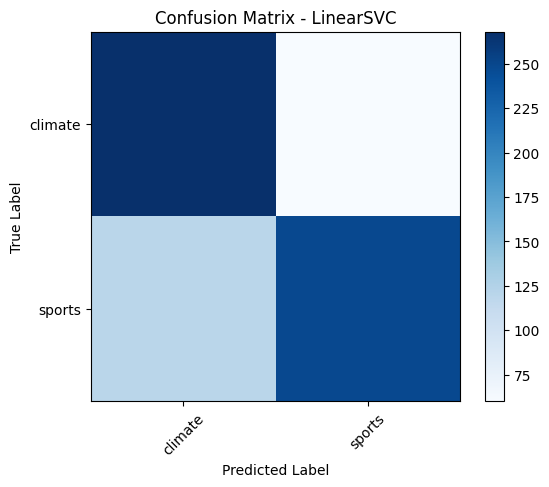

<Figure size 600x400 with 0 Axes>

In [ ]:
plot_all_metrics(predictions) # for hard svm

CalibratedClassifierCV(estimator=LinearSVC(C=10000, random_state=42))

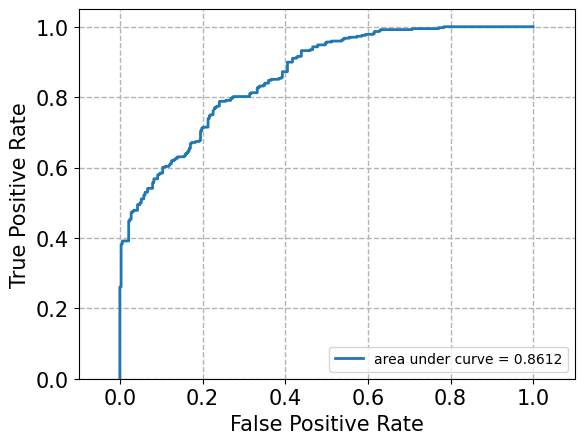

In [ ]:
fit_predict_and_plot_roc(hard_svm, X_train_LSI_scaled, root_vals, X_test_LSI_scaled, root_vals_test)

VERY SOFT SVM

In [ ]:
soft_svm = LinearSVC(C=0.001,random_state=42)
soft_svm = calibration.CalibratedClassifierCV(soft_svm)
# Train the classifier on the training data
soft_svm.fit(X_train_LSI_scaled, root_vals)
# Make predictions on the test data
predictions = soft_svm.predict(X_test_LSI_scaled)

              precision    recall  f1-score   support

     climate       0.77      0.77      0.77       328
      sports       0.80      0.80      0.80       368

    accuracy                           0.78       696
   macro avg       0.78      0.78      0.78       696
weighted avg       0.78      0.78      0.78       696

Accuracy: 
0.7844827586206896
[[253  75]
 [ 75 293]]


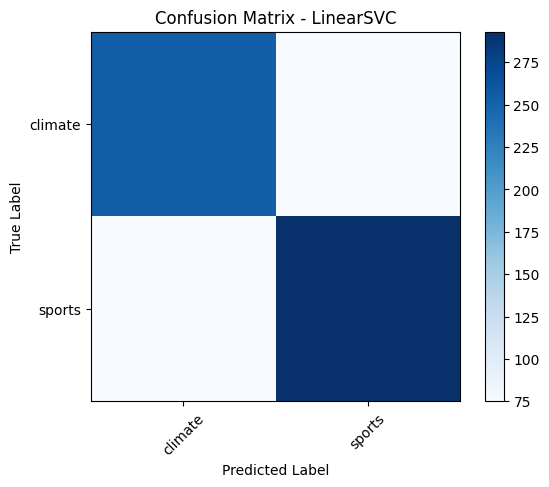

<Figure size 600x400 with 0 Axes>

In [ ]:
plot_all_metrics(predictions)

CalibratedClassifierCV(estimator=LinearSVC(C=0.001, random_state=42))

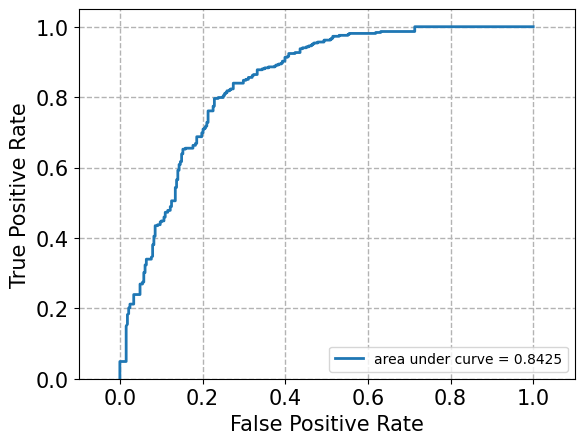

In [ ]:
fit_predict_and_plot_roc(soft_svm, X_train_LSI_scaled, root_vals, X_test_LSI_scaled, root_vals_test)

In [ ]:
# Create an SVM classifier with a high gamma value
svm_classifier = LinearSVC(C=0.01,random_state=42)

svm_classifier = calibration.CalibratedClassifierCV(svm_classifier)
# Train the classifier on the training data
svm_classifier.fit(X_train_LSI_scaled, root_vals)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test_LSI_scaled)
# Evaluate the accuracy of the model

              precision    recall  f1-score   support

     climate       0.69      0.75      0.72       328
      sports       0.76      0.70      0.73       368

    accuracy                           0.72       696
   macro avg       0.72      0.73      0.72       696
weighted avg       0.73      0.72      0.72       696

Accuracy: 
0.7241379310344828
[[246  82]
 [110 258]]


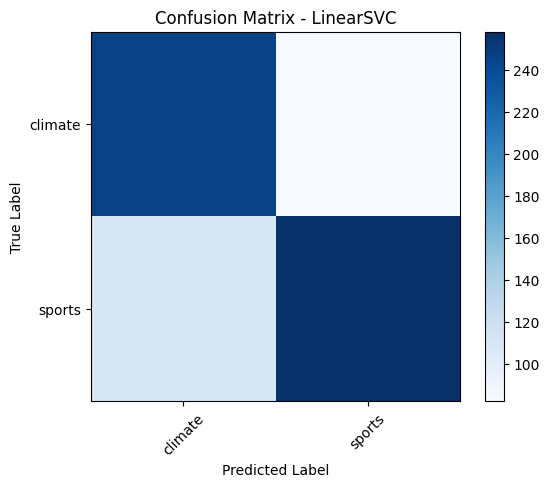

<Figure size 600x400 with 0 Axes>

In [ ]:
plot_all_metrics(predictions)

CalibratedClassifierCV(estimator=LinearSVC(C=0.01, random_state=42))

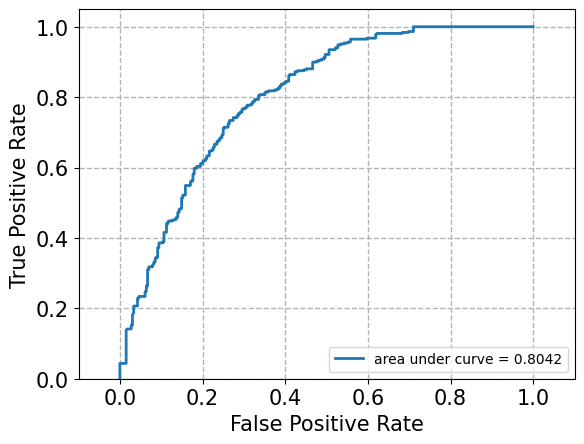

In [ ]:
fit_predict_and_plot_roc(svm_classifier, X_train_LSI_scaled, root_vals, X_test_LSI_scaled, root_vals_test)

CROSS Validation for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

gamma_values = np.logspace(-3, 6, num=10)
svm_pipeline = make_pipeline(StandardScaler(), LinearSVC())

# Define parameter grid for GridSearchCV
param_grid = {'linearsvc__C': 1/gamma_values}

# Create StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', refit='accuracy')

# Fit the model
grid_search.fit(X_train_LSI, root_vals_01)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Parameters:  {'linearsvc__C': 0.1}
Best Accuracy:  0.9568345323741008


Best C is 0.1

NON Linear SVM

In [ ]:
from sklearn.svm import SVC

gamma_value = 1000
svm_classifier = SVC(kernel='rbf', gamma=gamma_value)

# Train the SVM classifier
svm_classifier.fit(X_train_LSI_scaled, root_vals)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_LSI_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(root_vals_test, y_pred)
accuracy

0.5287356321839081

In [ ]:
from sklearn.svm import SVC

gamma_value = 0.0001
svm_classifier = SVC(kernel='rbf', gamma=gamma_value)

# Train the SVM classifier
svm_classifier.fit(X_train_LSI_scaled, root_vals)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_LSI_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(root_vals_test, y_pred)
accuracy

0.7729885057471264

In [ ]:
from sklearn.svm import SVC

gamma_value = 100000
svm_classifier = SVC(kernel='rbf', gamma=gamma_value)

# Train the SVM classifier
svm_classifier.fit(X_train_LSI_scaled, root_vals)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_LSI_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(root_vals_test, y_pred)
accuracy

0.5287356321839081

### QUESTION 6: Evaluate a logistic classifier:

In [ ]:
# Train a logistic classifier without regularization

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, penalty=None, max_iter = 2000).fit(X_train_LSI, root_vals)
root_vals_pred = clf.predict(X_test_LSI)
print(clf.score(X_test_LSI, root_vals_test))

0.6839080459770115


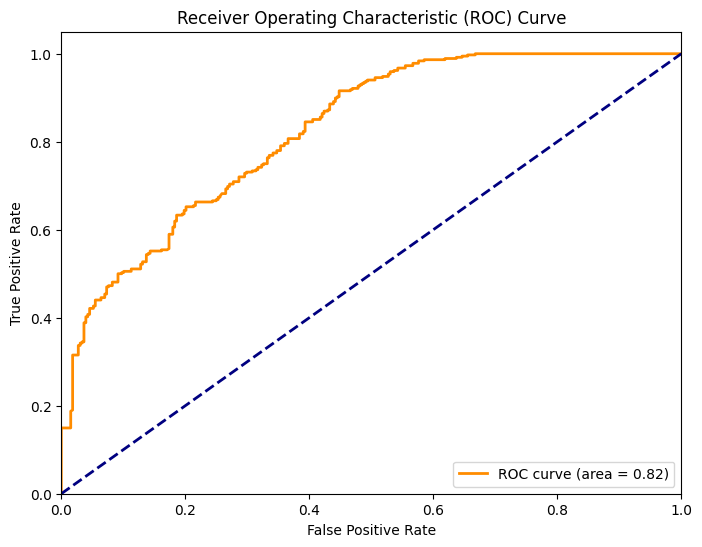

In [ ]:
# plot the ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

prob_score = clf.predict_proba(X_test_LSI)
fpr, tpr, _ = roc_curve(root_vals_test, prob_score[:,1], pos_label='sports')

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

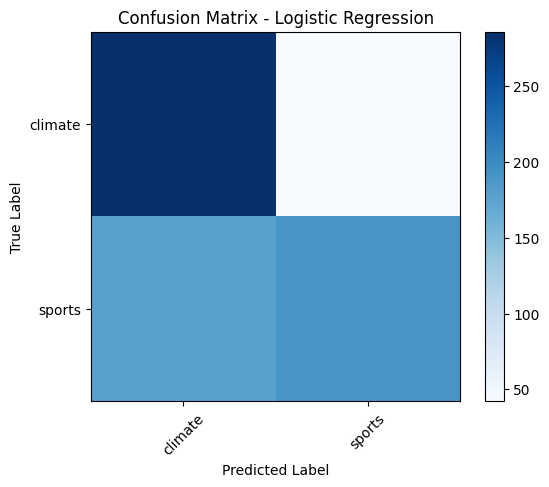

<Figure size 600x400 with 0 Axes>


Accuracy: 0.6839080459770115
Recall: 0.6839080459770115
Precision: 0.7234938565200159
F1 Score: 0.6752234993614303


In [ ]:
# report the confusion matrix

from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(root_vals_test, root_vals_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
classes = np.unique(root_vals_test)
tick_marks = np.arange(2)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.figure(figsize=(6, 4))

plt.show()

# calculate the accuracy, recall precision and F-1 score of this classifier on the testing set
def LR_print_metrics(root_vals_test, root_vals_pred):
  accuracy = accuracy_score(root_vals_test, root_vals_pred)
  recall = recall_score(root_vals_test, root_vals_pred, average='weighted')
  precision = precision_score(root_vals_test, root_vals_pred, average='weighted')
  f1 = f1_score(root_vals_test, root_vals_pred, average='weighted')

  print("\nAccuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1 Score:", f1)

LR_print_metrics(root_vals_test, root_vals_pred)

In [ ]:
# using 5-fold cross-validation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Specify the range of regularization strengths
regularization_strengths = [10**k for k in range(-5, 6)]

best_l1_strength = None
best_l2_strength = None
best_l1_accuracy = 0
best_l2_accuracy = 0

# Perform 5-fold cross-validation for each regularization strength
for strength in regularization_strengths:
    # Train logistic regression model with L1 regularization
    l1_model = LogisticRegression(penalty='l1', C=strength, solver='liblinear', random_state=42, max_iter=2000)
    l1_scores = cross_val_score(l1_model, X_train_LSI, root_vals, cv=5)
    avg_l1_accuracy = np.mean(l1_scores)

    # Train logistic regression model with L2 regularization
    l2_model = LogisticRegression(penalty='l2', C=strength, solver='lbfgs', random_state=42, max_iter=2000)
    l2_scores = cross_val_score(l2_model, X_train_LSI, root_vals, cv=5)
    avg_l2_accuracy = np.mean(l2_scores)

    # Update best regularization strength if necessary
    if avg_l1_accuracy > best_l1_accuracy:
        best_l1_accuracy = avg_l1_accuracy
        best_l1_strength = strength
        l1_model.fit(X_train_LSI, root_vals)
        root_vals_pred_l1 = l1_model.predict(X_test_LSI)

    if avg_l2_accuracy > best_l2_accuracy:
        best_l2_accuracy = avg_l2_accuracy
        best_l2_strength = strength
        l2_model.fit(X_train_LSI, root_vals)
        root_vals_pred_l2 = l2_model.predict(X_test_LSI)

print("Best L1 Regularization Strength:", best_l1_strength)
print("Best L2 Regularization Strength:", best_l2_strength)


Best L1 Regularization Strength: 10
Best L2 Regularization Strength: 100


Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.

In [ ]:
# w/o regularization
LR_print_metrics(root_vals_test, root_vals_pred)
# w/ L1
LR_print_metrics(root_vals_test, root_vals_pred_l1)
# w/ L2
LR_print_metrics(root_vals_test, root_vals_pred_l2)


Accuracy: 0.6839080459770115
Recall: 0.6839080459770115
Precision: 0.7234938565200159
F1 Score: 0.6752234993614303

Accuracy: 0.6882183908045977
Recall: 0.6882183908045977
Precision: 0.7072882647426016
F1 Score: 0.6850274663543215

Accuracy: 0.6939655172413793
Recall: 0.6939655172413793
Precision: 0.714159702420891
F1 Score: 0.6906438303539765


#### Question 7 - Naive Bayes Analysis

Evaluate and profile a Na¨ıve Bayes classifier: Train a GaussianNB classifier; plot the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of this classifier on the testing set.


In [ ]:
# Question 7 - Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer and transform the training and testing data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf_simplified = tfidf_vectorizer.fit_transform(train['lemmatized_text'])
X_test_tfidf_simplified = tfidf_vectorizer.transform(test['lemmatized_text'])

# Convert the TF-IDF matrices to dense format using .toarray() instead of .todense()
X_train_dense = X_train_tfidf_simplified.toarray()
X_test_dense = X_test_tfidf_simplified.toarray()

# Training the GaussianNB classifier
gnb = GaussianNB()
gnb.fit(X_train_dense, train['root_label'])

# Making predictions on the testing set
y_pred = gnb.predict(X_test_dense)
y_test = test['root_label']

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve data
fpr, tpr, _ = roc_curve(y_test, gnb.predict_proba(X_test_dense)[:,1], pos_label=gnb.classes_[1])
roc_auc = auc(fpr, tpr)

print("accuracy: ", accuracy, "\nrecall: ", recall, "\nprecision: ", precision, "\nf1: ",f1, "\nconf_matrix: ", conf_matrix, "\nroc_auc: ", roc_auc)


accuracy:  0.9626436781609196 
recall:  0.9626436781609196 
precision:  0.9637205049695026 
f1:  0.9626733260353949 
conf_matrix:  [[323   5]
 [ 21 347]] 
roc_auc:  0.9788200888123011


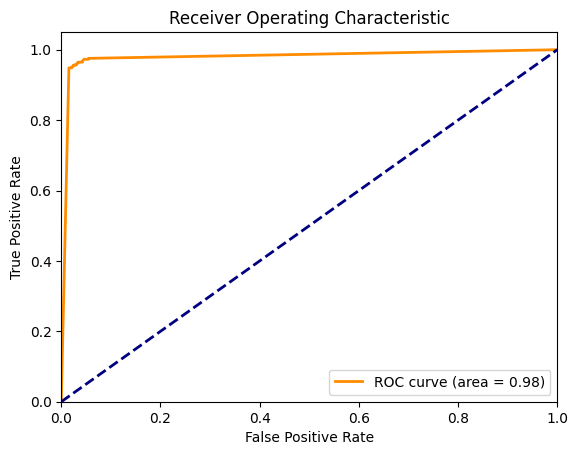

In [ ]:
# Get prediction probabilities for the positive class
y_pred_prob = gnb.predict_proba(X_test_dense)[:, 1]

# Map your categorical labels to binary
y_test_binary = y_test.map({'climate': 0, 'sports': 1})

# Compute the probability scores for the positive class
y_score = gnb.predict_proba(X_test_dense)[:, 1]

# Compute ROC curve data
fpr, tpr, thresholds = roc_curve(y_test_binary, y_score)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

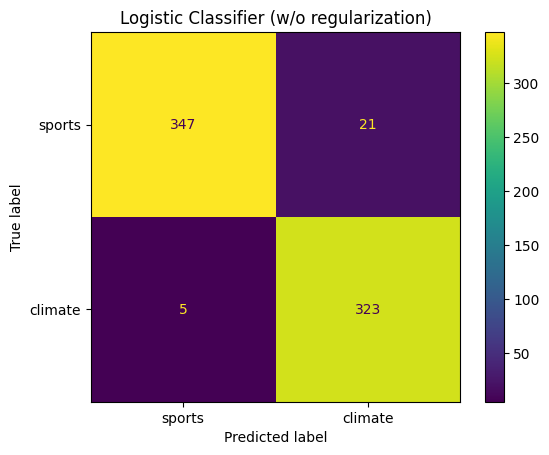

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['sports', 'climate'])

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['sports', 'climate']).plot()

# Customize and save the plot
plt.title('Logistic Classifier (w/o regularization)')
plt.savefig('Q52.png', dpi=300, bbox_inches='tight')
plt.show()

### Question 8 - Train Pipeline to Compare Binary Classification Methods - Grid Search

In this part, you will attempt to find the best model for binary classification.

- Construct a Pipeline that performs feature extraction, dimensionality reduction and classification;
- The evaluation of each combination is performed with 5-fold cross-validation (use the average
validation set accuracy across folds).
-  In addition to any other hyperparameters you choose, your gridsearch must at least include:
- What are the 5 best combinations? Report their performances on the testing set.


In [ ]:
# Question 8
# This is Gian's simple implementation that may need some parameter tweaking
# Expect a **very** long runtime

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('dim_reduction', 'passthrough'),
    ('classifier', 'passthrough')
])

# Define the parameter grid
param_grid = {
    'vectorizer__min_df': [3, 5],
    'dim_reduction': [TruncatedSVD(), NMF()],
    'dim_reduction__n_components': [5, 30, 80],
    'classifier': [SVC(), LogisticRegression(), GaussianNB()],
    # Include additional parameters for classifiers here (e.g., 'classifier__C': [1, 10, 100])
}

# Instantiate the grid search with 5-fold cross-validation and a scoring method
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=make_scorer(accuracy_score), verbose=1, n_jobs=-1)

# Train the model using the grid search on the training data
grid_search.fit(train['lemmatized_text'], train['root_label'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('dim_reduction', 'passthrough'),
                                       ('classifier', 'passthrough')]),
             n_jobs=-1,
             param_grid={'classifier': [SVC(), LogisticRegression(),
                                        GaussianNB()],
                         'dim_reduction': [TruncatedSVD(n_components=80),
                                           NMF()],
                         'dim_reduction__n_components': [5, 30, 80],
                         'vectorizer__min_df': [3, 5]},
             scoring=make_scorer(accuracy_score), verbose=1)

In [ ]:
# Get all the results from the grid search
results = grid_search.cv_results_

# Sort the scores and extract the top 5
top5_idxs = np.argsort(results['mean_test_score'])[-5:]

print("Top 5 Combinations:")
for i in top5_idxs[::-1]:  # Reverse the indices to start from the best score
    print("Params: {}, Mean CV Score: {:.4f}".format(results['params'][i],
                                                     results['mean_test_score'][i]))
# Evaluate on the test set using the best estimator found in the Grid Search
best_model = grid_search.best_estimator_
test_score = best_model.score(test['lemmatized_text'], test['root_label'])
print("Test Score of the best model:", test_score)

Top 5 Combinations:
Params: {'classifier': SVC(), 'dim_reduction': TruncatedSVD(n_components=80), 'dim_reduction__n_components': 80, 'vectorizer__min_df': 3}, Mean CV Score: 0.9608
Params: {'classifier': SVC(), 'dim_reduction': TruncatedSVD(n_components=80), 'dim_reduction__n_components': 80, 'vectorizer__min_df': 5}, Mean CV Score: 0.9561
Params: {'classifier': SVC(), 'dim_reduction': NMF(), 'dim_reduction__n_components': 80, 'vectorizer__min_df': 3}, Mean CV Score: 0.9561
Params: {'classifier': SVC(), 'dim_reduction': TruncatedSVD(n_components=80), 'dim_reduction__n_components': 30, 'vectorizer__min_df': 5}, Mean CV Score: 0.9547
Params: {'classifier': SVC(), 'dim_reduction': TruncatedSVD(n_components=80), 'dim_reduction__n_components': 30, 'vectorizer__min_df': 3}, Mean CV Score: 0.9529
Test Score of the best model: 0.9640804597701149


In [ ]:
# Get the best combination of parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'classifier': SVC(), 'dim_reduction': TruncatedSVD(n_components=80), 'dim_reduction__n_components': 80, 'vectorizer__min_df': 3}
Best Score: 0.9607913669064748


In [ ]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(test['lemmatized_text'], test['root_label'])

print("Test Score:", test_score)

Test Score: 0.9640804597701149


### Question 9 - Multiclass Classification
In this part, we aim to learn classifiers on the documents belonging to unique classes in the column leaf label.

Perform Na¨ıve Bayes classification and multiclass SVM classification (with both One VS One and
One VS the rest methods described above) and report the confusion matrix and calculate the
accuracy, recall, precision and F-1 score of your classifiers. How did you resolve the class
imbalance issue in the One VS the rest model?

In addition, answer the following questions:
- In the confusion matrix you should have an 10 × 10 matrix where 10 is the number of unique
labels in the column leaf label. Please make sure that the order of these labels is as
follows:

map_row_to_class = {0:"basketball", 1:"baseball", 2:"tennis",
3:"football", 4:"soccer", 5:"forest fire", 6:"flood",
7:"earthquake", 8:"drought", 9:"heatwave"}


Do you observe any structure in the confusion matrix? Are there distinct visible blocks on the
major diagonal? What does this mean?

- Based on your observation from the previous part, suggest a subset of labels that should be
merged into a new larger label and recompute the accuracy and plot the confusion matrix.
How did the accuracy change in One VS One and One VS the rest?

- Does class imbalance impact the performance of the classification once some classes are
merged? Provide a resolution for the class imbalance and recompute the accuracy and plot
the confusion matrix in One VS One and One VS the rest?.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, recall, precision, f1, conf_matrix

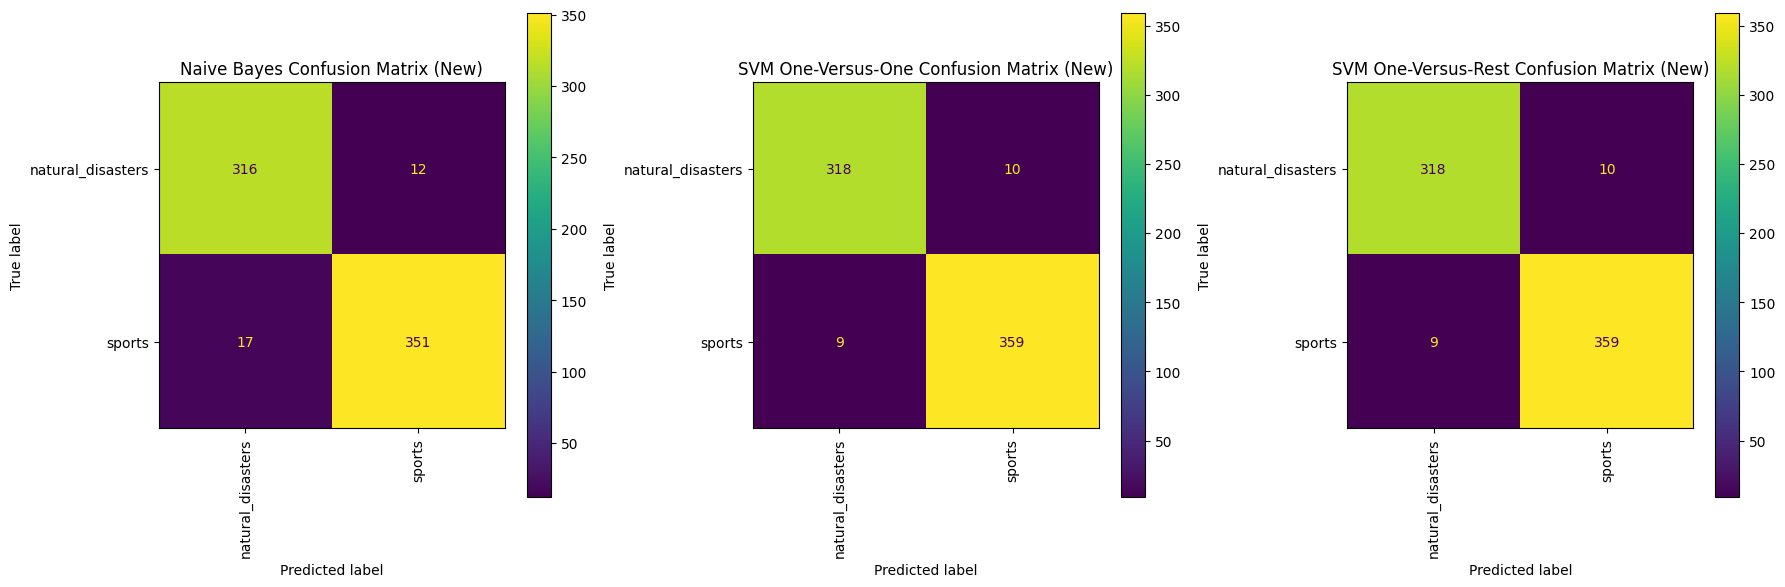

In [ ]:
def display_conf_matrix(nb_predictions_new, svm_ovo_predictions_new, svm_ovr_predictions_new, y_test):
  # Assuming 'y_test' contains the true labels after merging
  # Compute and display confusion matrices for the updated classifiers
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

  # Naive Bayes Confusion Matrix
  cm_nb_new = confusion_matrix(y_test, nb_predictions_new)
  disp_nb_new = ConfusionMatrixDisplay(confusion_matrix=cm_nb_new, display_labels=np.unique(y_test))
  disp_nb_new.plot(ax=axes[0])
  axes[0].set_title('Naive Bayes Confusion Matrix (New)')
  axes[0].tick_params(axis='x', rotation=90)
  axes[0].tick_params(axis='y', rotation=0)

  # SVM One-Versus-One Confusion Matrix
  cm_svm_ovo_new = confusion_matrix(y_test, svm_ovo_predictions_new)
  disp_svm_ovo_new = ConfusionMatrixDisplay(confusion_matrix=cm_svm_ovo_new, display_labels=np.unique(y_test))
  disp_svm_ovo_new.plot(ax=axes[1])
  axes[1].set_title('SVM One-Versus-One Confusion Matrix (New)')
  axes[1].tick_params(axis='x', rotation=90)
  axes[1].tick_params(axis='y', rotation=0)

  # SVM One-Versus-Rest Confusion Matrix
  cm_svm_ovr_new = confusion_matrix(y_test, svm_ovr_predictions_new)
  disp_svm_ovr_new = ConfusionMatrixDisplay(confusion_matrix=cm_svm_ovr_new, display_labels=np.unique(y_test))
  disp_svm_ovr_new.plot(ax=axes[2])
  axes[2].set_title('SVM One-Versus-Rest Confusion Matrix (New)')
  axes[2].tick_params(axis='x', rotation=90)
  axes[2].tick_params(axis='y', rotation=0)

  plt.tight_layout()
  plt.show()

In [ ]:
# Question 9
X = df['full_text']  # preprocessed text column
y = df['leaf_label']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# SVM Classifier - One-Versus-One
svm_ovo_classifier = SVC(decision_function_shape='ovo', class_weight='balanced')
svm_ovo_classifier.fit(X_train, y_train)
svm_ovo_predictions = svm_ovo_classifier.predict(X_test)

# SVM Classifier - One-Versus-Rest
svm_ovr_classifier = SVC(decision_function_shape='ovr', class_weight='balanced')
svm_ovr_classifier.fit(X_train, y_train)
svm_ovr_predictions = svm_ovr_classifier.predict(X_test)

# Evaluate Naive Bayes
nb_metrics = calculate_metrics(y_test, nb_predictions)

# Evaluate SVM One-Versus-One
svm_ovo_metrics = calculate_metrics(y_test, svm_ovo_predictions)

# Evaluate SVM One-Versus-Rest
svm_ovr_metrics = calculate_metrics(y_test, svm_ovr_predictions)

print("Naive Bayes Metrics:", nb_metrics)
print("SVM One-Versus-One Metrics:", svm_ovo_metrics)
print("SVM One-Versus-Rest Metrics:", svm_ovr_metrics)

Naive Bayes Metrics: (0.7227011494252874, 0.7250355433592107, 0.7398980597860925, 0.7276829564460531, array([[53,  2,  1,  0,  6,  3,  2,  5,  1,  2],
       [ 0, 85,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0, 60,  0,  0,  0,  1,  7,  0,  0],
       [ 0,  0,  0, 49,  1,  1,  1,  1,  1,  0],
       [ 0,  0,  1,  0, 62,  0,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  2,  0],
       [ 0,  0,  4,  1,  0,  0,  8, 58,  2,  0],
       [ 0,  0,  1,  0,  4,  0, 50, 10,  2,  0],
       [ 0,  1,  0,  0,  0,  7,  0,  0, 65,  0],
       [ 5,  0,  0,  0,  3,  3,  0,  4,  2, 52]]))
SVM One-Versus-One Metrics: (0.7385057471264368, 0.7368790867264969, 0.7709011472762248, 0.7512170316965516, array([[67,  0,  0,  0,  0,  0,  4,  2,  0,  2],
       [ 1, 84,  0,  0,  0,  2,  1,  0,  0,  2],
       [ 2,  0, 60,  0,  0,  0,  2,  4,  0,  0],
       [ 3,  0,  0, 45,  0,  0,  3,  2,  1,  0],
       [ 2,  0,  0,  0, 59,  0,  5,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 58,  1,  0,  0,  0],
   

In [ ]:
display_conf_matrix(nb_predictions,svm_ovo_predictions,svm_ovr_predictions,y_test)

In [ ]:
# Updated q9 with new labels

# == start updated section ==
# Merge the labels as specified
sports_labels = ['tennis', 'basketball', 'baseball', 'football', 'soccer']
natural_disaster_labels = ['forest fire', 'flood', 'earthquake', 'drought', 'heatwave']

df['merged_label'] = df['leaf_label'].replace(sports_labels, 'sports').replace(natural_disaster_labels, 'natural_disasters')

# Now 'merged_label' is your target variable
X = df['full_text']  # Make sure this column is preprocessed
y = df['merged_label']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
# == end updated section ==

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# SVM Classifier - One-Versus-One
svm_ovo_classifier = SVC(decision_function_shape='ovo', class_weight='balanced')
svm_ovo_classifier.fit(X_train, y_train)
svm_ovo_predictions = svm_ovo_classifier.predict(X_test)

# SVM Classifier - One-Versus-Rest
svm_ovr_classifier = SVC(decision_function_shape='ovr', class_weight='balanced')
svm_ovr_classifier.fit(X_train, y_train)
svm_ovr_predictions = svm_ovr_classifier.predict(X_test)

# Evaluate Naive Bayes
nb_metrics = calculate_metrics(y_test, nb_predictions)

# Evaluate SVM One-Versus-One
svm_ovo_metrics = calculate_metrics(y_test, svm_ovo_predictions)

# Evaluate SVM One-Versus-Rest
svm_ovr_metrics = calculate_metrics(y_test, svm_ovr_predictions)

print("Naive Bayes Metrics:", nb_metrics)
print("SVM One-Versus-One Metrics:", svm_ovo_metrics)
print("SVM One-Versus-Rest Metrics:", svm_ovr_metrics)

Naive Bayes Metrics: (0.9612068965517241, 0.961658271474019, 0.9607764501591765, 0.9611194905312552, array([[318,  10],
       [ 17, 351]]))
SVM One-Versus-One Metrics: (0.9727011494252874, 0.9725278366914103, 0.9726883966087367, 0.9726060882264596, array([[318,  10],
       [  9, 359]]))
SVM One-Versus-Rest Metrics: (0.9727011494252874, 0.9725278366914103, 0.9726883966087367, 0.9726060882264596, array([[318,  10],
       [  9, 359]]))


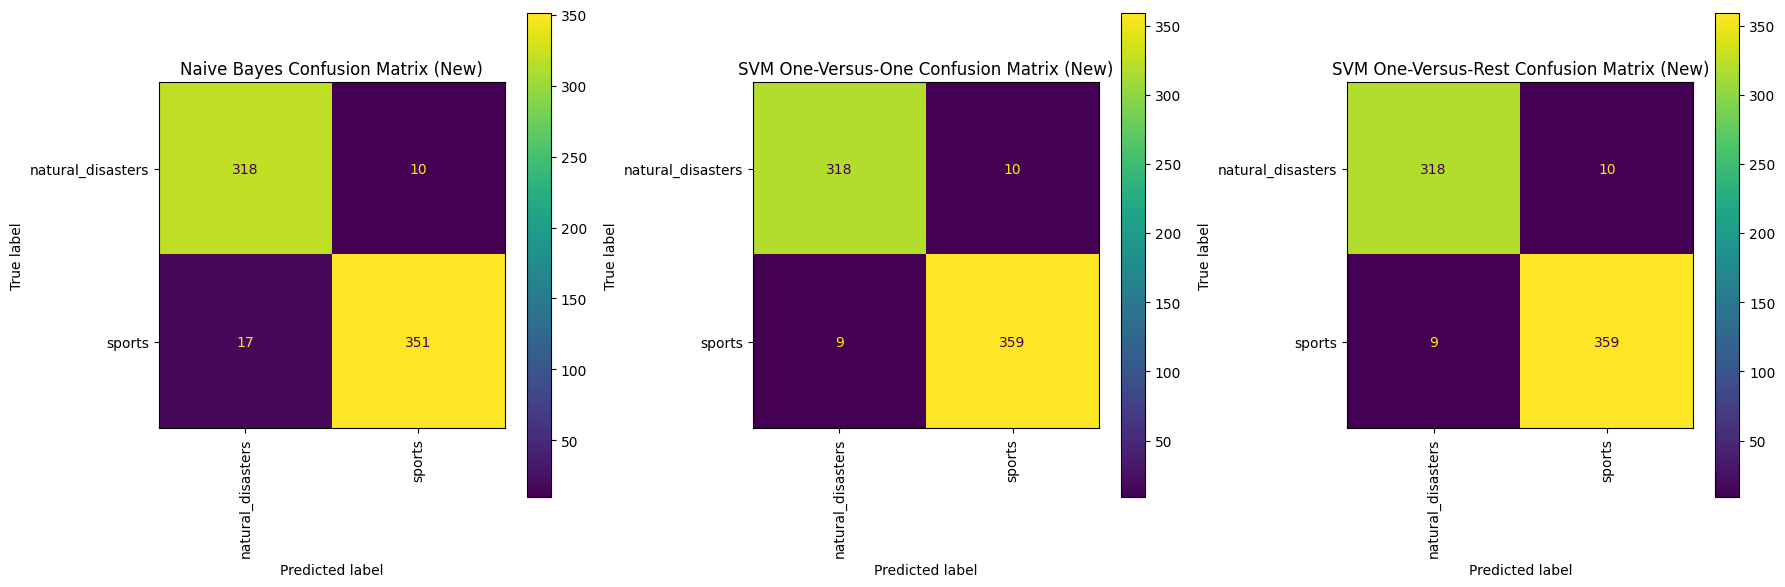

In [ ]:
display_conf_matrix(nb_predictions,svm_ovo_predictions,svm_ovr_predictions,y_test)

In [ ]:
# Updated q9 with resolution for class imbalance

# Merge the labels as specified
sports_labels = ['tennis', 'basketball', 'baseball', 'football', 'soccer']
natural_disaster_labels = ['forest fire', 'flood', 'earthquake', 'drought', 'heatwave']

df['merged_label'] = df['leaf_label'].replace(sports_labels, 'sports').replace(natural_disaster_labels, 'natural_disasters')

# Now 'merged_label' is your target variable
X = df['full_text']  # Make sure this column is preprocessed
y = df['merged_label']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


# ===== start new section =====
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)
nb_predictions = nb_classifier.predict(X_test)

# SVM Classifier - One-Versus-One
svm_ovo_classifier = SVC(decision_function_shape='ovo', class_weight='balanced')
svm_ovo_classifier.fit(X_train_resampled, y_train_resampled)
svm_ovo_predictions = svm_ovo_classifier.predict(X_test)

# SVM Classifier - One-Versus-Rest
svm_ovr_classifier = SVC(decision_function_shape='ovr', class_weight='balanced')
svm_ovr_classifier.fit(X_train_resampled, y_train_resampled)
svm_ovr_predictions = svm_ovr_classifier.predict(X_test)
# ===== end new section =====

# Evaluate Naive Bayes
nb_metrics = calculate_metrics(y_test, nb_predictions)

# Evaluate SVM One-Versus-One
svm_ovo_metrics = calculate_metrics(y_test, svm_ovo_predictions)

# Evaluate SVM One-Versus-Rest
svm_ovr_metrics = calculate_metrics(y_test, svm_ovr_predictions)

print("Naive Bayes Metrics:", nb_metrics)
print("SVM One-Versus-One Metrics:", svm_ovo_metrics)
print("SVM One-Versus-Rest Metrics:", svm_ovr_metrics)

Naive Bayes Metrics: (0.9583333333333334, 0.9586094909862142, 0.9579455488546398, 0.958227698777502, array([[316,  12],
       [ 17, 351]]))
SVM One-Versus-One Metrics: (0.9727011494252874, 0.9725278366914103, 0.9726883966087367, 0.9726060882264596, array([[318,  10],
       [  9, 359]]))
SVM One-Versus-Rest Metrics: (0.9727011494252874, 0.9725278366914103, 0.9726883966087367, 0.9726060882264596, array([[318,  10],
       [  9, 359]]))


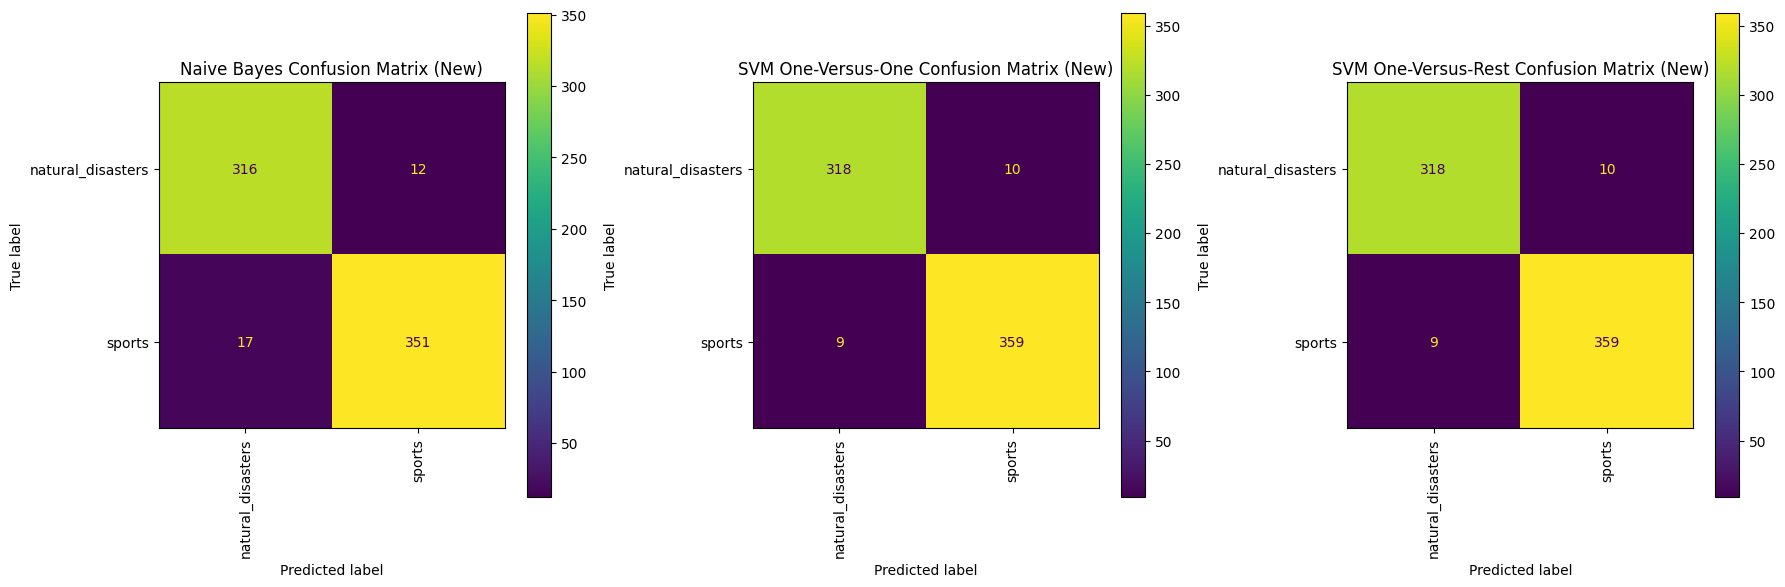

In [ ]:
display_conf_matrix(nb_predictions,svm_ovo_predictions,svm_ovr_predictions,y_test)

### Question 10 - GLoVE Intro

What do you expect for the values of,
||GLoVE["woman"] - GLoVE["man"]||2, ||GLoVE["wife"] - GLoVE["husband"]||2 and
||GLoVE["wife"] - GLoVE["orange"]||2 ? Compare these values.

In [ ]:
# Question 10

In [ ]:
def vectorize(word):
  return embeddings_dict['word']


dimension_of_glove = 300
path = '/content/drive/MyDrive/glove.6B/'
mapping = {1: path+'glove.6B.50d.txt', 2: path+'glove.6B.100d.txt', 3: path+'glove.6B.200d.txt', 4: path +'glove.6B.300d.txt'}

# def read_embeddings(idx):
#   embeddings_dict = {}
#   with open(mapping[idx], 'r') as f:
#     for line in f:
#       values = line.split()
#       word = values[0]
#       vector = np.asarray(values[1:], "float32")
#       embeddings_dict[word] = vector
#   return embeddings_dict

# class g_vectorizer(object):
#   def __init__(self, w2v):
#     self.w2v = w2v
#     if len(w2v) == 0:
#       self.dimensions == 0
#     else:
#       self.dimensions = len(w2v[next(iter(embeddings_dict))])

#   def transform(self, full_text, keywords):
#     # print(X)
#     ft_array = np.array([np.mean([self.w2v[w] for w in words if w in self.w2v]
#                              or [np.zeros(self.dimensions)], axis=0) for words in full_text])
#     keyword_arr = np.array([np.mean([self.w2v[w] for w in words if w in self.w2v]
#                              or [np.zeros(self.dimensions)], axis=0) for words in keywords])

#     print(ft_array.shape)
#     print(keyword_arr.shape)
#     final_arr = (ft_array + keyword_arr)/2
#     return final_arr
import numpy as np

def read_embeddings(index):
    embeddings_dict = {}
    with open(mapping[index], 'r') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype="float32")
            embeddings_dict[word] = vector
    return embeddings_dict

class GVectorizer:
    def __init__(self, word_embeddings):
        self.word_embeddings = word_embeddings
        self.dimensions = len(word_embeddings[next(iter(word_embeddings))]) if word_embeddings else 0

    def transform(self, full_text, keywords):
        ft_array = np.array([
            np.mean([self.word_embeddings[word] for word in words if word in self.word_embeddings]
                    or [np.zeros(self.dimensions)], axis=0) for words in full_text
        ])
        keyword_arr = np.array([
            np.mean([self.word_embeddings[word] for word in words if word in self.word_embeddings]
                    or [np.zeros(self.dimensions)], axis=0) for words in keywords
        ])

        print("Full Text Array Shape:", ft_array.shape)
        print("Keywords Array Shape:", keyword_arr.shape)

        final_arr = (ft_array + keyword_arr) / 2
        return final_arr


In [ ]:
glove_embedding = read_embeddings(4)

In [ ]:
words = ["woman", "man", "wife", "husband", "orange"]

# Get the word vectors
vectors = [glove_embedding[word] for word in words]

# Compute Euclidean distances
dist_woman_man = np.linalg.norm(vectors[0] - vectors[1])
dist_wife_husband = np.linalg.norm(vectors[2] - vectors[3])
dist_wife_orange = np.linalg.norm(vectors[2] - vectors[4])

# Print the distances
print(f"||GLoVE['woman'] - GLoVE['man']||₂: {dist_woman_man}")
print(f"||GLoVE['wife'] - GLoVE['husband']||₂: {dist_wife_husband}")
print(f"||GLoVE['wife'] - GLoVE['orange']||₂: {dist_wife_orange}")

||GLoVE['woman'] - GLoVE['man']||₂: 4.753939628601074
||GLoVE['wife'] - GLoVE['husband']||₂: 3.1520464420318604
||GLoVE['wife'] - GLoVE['orange']||₂: 8.667715072631836


We can see that distance between woman and man is similar to distance between wife and husband
while distance between wife and orange is much larger than the first two

In [ ]:
keyword_train, keyword_test = train_test_split(df, test_size=0.2)

In [ ]:
#glove_full_text = df.apply(clean) #clean data samples
glove_train_ft = keyword_train.apply(clean, axis=1)
glove_test_ft = keyword_test.apply(clean, axis=1)

In [ ]:
accuracy_dict ={}
for i in range (1,5):
  embeddings_dict = read_embeddings(i)
  print(mapping[i])
  glove_vectorizer = g_vectorizer(embeddings_dict)
  glove_train = glove_vectorizer.transform(glove_train_ft, keyword_train["keywords"])
  glove_test = glove_vectorizer.transform(glove_test_ft, keyword_test["keywords"])

  cachedir = mkdtemp()
  NB_glove_pipe = Pipeline(steps=[("clf", GaussianNB())], memory=cachedir)
  glove_clf = NB_glove_pipe.fit(glove_train, keyword_train['root_label'])
  glove_pred = glove_clf.predict(glove_test)

  #Confusion Matrix
  print("Glove Model performance for " + mapping[i] + " vectors")
  print("GLoVE clf Confusion Matrix:\n",confusion_matrix(keyword_test['root_label'], glove_pred))
  # Model Accuracy: how often is the classifier correct?
  print("GLoVE clf Accuracy:",accuracy_score(keyword_test['root_label'], glove_pred))
  accuracy_dict[mapping[i][mapping[i].find('B')+1:mapping[i].rfind('d')]] = accuracy_score(keyword_test['root_label'], glove_pred)

/content/drive/MyDrive/glove.6B/glove.6B.50d.txt
(2780, 50)
(2780, 50)
(696, 50)
(696, 50)
Glove Model performance for /content/drive/MyDrive/glove.6B/glove.6B.50d.txt vectors
GLoVE clf Confusion Matrix:
 [[264  86]
 [100 246]]
GLoVE clf Accuracy: 0.7327586206896551
/content/drive/MyDrive/glove.6B/glove.6B.100d.txt
(2780, 100)
(2780, 100)
(696, 100)
(696, 100)
Glove Model performance for /content/drive/MyDrive/glove.6B/glove.6B.100d.txt vectors
GLoVE clf Confusion Matrix:
 [[253  97]
 [ 93 253]]
GLoVE clf Accuracy: 0.7270114942528736
/content/drive/MyDrive/glove.6B/glove.6B.200d.txt
(2780, 200)
(2780, 200)
(696, 200)
(696, 200)
Glove Model performance for /content/drive/MyDrive/glove.6B/glove.6B.200d.txt vectors
GLoVE clf Confusion Matrix:
 [[268  82]
 [ 99 247]]
GLoVE clf Accuracy: 0.7399425287356322
/content/drive/MyDrive/glove.6B/glove.6B.300d.txt
(2780, 300)
(2780, 300)
(696, 300)
(696, 300)
Glove Model performance for /content/drive/MyDrive/glove.6B/glove.6B.300d.txt vectors
GLoVE

In [ ]:
[a[1:][9:] for a in accuracy_dict.keys()]

['50', '100', '200', '300']

In [ ]:
list(accuracy_dict.values())

[0.7327586206896551,
 0.7270114942528736,
 0.7399425287356322,
 0.7442528735632183]

Text(0.5, 1.0, 'Dimension size vs accuracy trend')

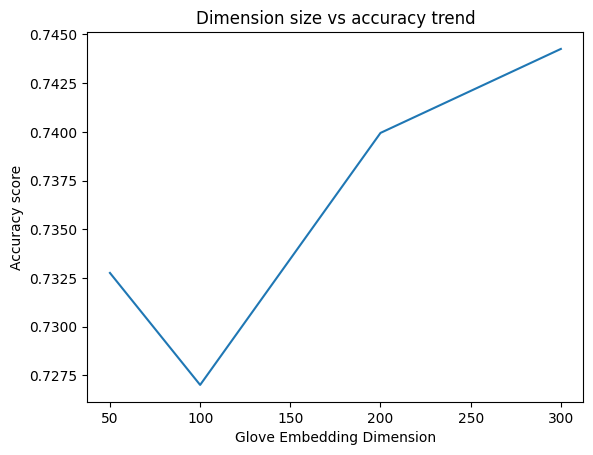

In [ ]:
accuracy_dict
plt.plot([int(a[1:][9:]) for a in accuracy_dict.keys()], list(accuracy_dict.values()))
plt.xlabel('Glove Embedding Dimension')
plt.ylabel('Accuracy score')
plt.title('Dimension size vs accuracy trend')

### QUESTION 11: For the binary classification task distinguishing the “sports” class and “climate” class:

Select a classifier model, train and evaluate it with your GLoVE-based feature. If you are doing
any cross-validation, please make sure to use a limited set of options so that your code finishes
running in a reasonable amount of time.



In [ ]:
# Question 11

### QUESTION 12:
Plot the relationship between the dimension of the pre-trained GLoVE embedding
and the resulting accuracy of the model in the classification task. Describe the observed trend. Is
this trend expected? Why or why not? In this part use the different sets of GLoVE vectors from the
link.


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=ae73197365ced6e4510b4d0c73200fde83dfa2fbd23ff138e2132bba0a9737f3
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import umap

In [ ]:
sc_map = {'sports':0, 'climate':1}
np.append(glove_train , np.reshape([sc_map[x] for x in keyword_train['root_label']],(-1,1)), 1)

array([[-0.18514925, -0.04342392, -0.21454495, ..., -0.13407977,
         0.20718136,  1.        ],
       [-0.17334384, -0.01503977, -0.20828269, ..., -0.15432666,
         0.214609  ,  1.        ],
       [-0.15541545,  0.01147782, -0.2049479 , ..., -0.14991328,
         0.22023147,  0.        ],
       ...,
       [-0.19315752, -0.01687368, -0.21839175, ..., -0.15771049,
         0.20006151,  0.        ],
       [-0.17208739,  0.00355253, -0.20292971, ..., -0.13517752,
         0.20910016,  0.        ],
       [-0.19063023, -0.01270343, -0.22685327, ..., -0.15616763,
         0.21586931,  1.        ]])

In [ ]:
glove_train_C = glove_train
reducer = umap.UMAP(random_state=42)
reducer.fit(glove_train)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

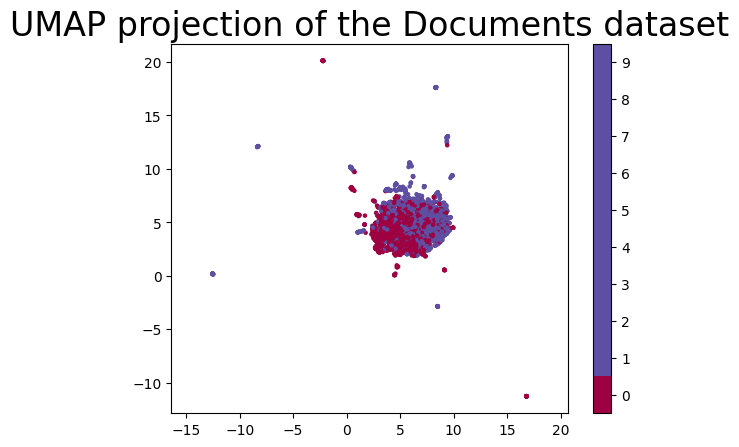

In [ ]:
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=[sc_map[x] for x in keyword_train['root_label']], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Documents dataset', fontsize=24);

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


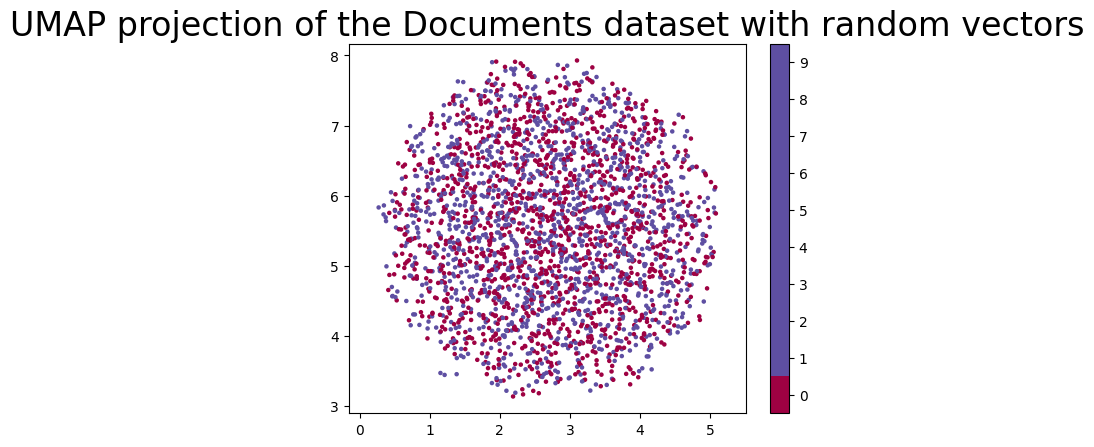

In [ ]:
random_vectors = np.random.normal(3, 2.5, size=(2780, 300))
reducer2 = umap.UMAP(random_state=42)
reducer2.fit(random_vectors)
plt.scatter(reducer2.embedding_[:, 0], reducer2.embedding_[:, 1], c=[sc_map[x] for x in keyword_train['root_label']], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Documents dataset with random vectors', fontsize=24);

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.decomposition import NMF
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline

#using Rank 1 pipeline as basis from Question 8
cachedir = mkdtemp()
NB_glove_pipe = Pipeline(steps=[("clf", GaussianNB())], memory=cachedir)
glove_clf = NB_glove_pipe.fit(glove_train, keyword_train['root_label'])
glove_pred = glove_clf.predict(glove_test)
#Confusion Matrix
print("GLoVE clf Confusion Matrix:\n",confusion_matrix(keyword_test['root_label'], glove_pred))
# Model Accuracy: how often is the classifier correct?
print("GLoVE clf Accuracy:",accuracy_score(keyword_test['root_label'], glove_pred))

GLoVE clf Confusion Matrix:
 [[270  80]
 [ 98 248]]
GLoVE clf Accuracy: 0.7442528735632183
